## KHÓA HỌC: LẬP TRÌNH PYTHON CĂN BẢN
-----
Phân tích và xử lý dữ liệu với Pandas - Phần 02
----


# Nội dung bài học
---
1. Xóa cột/hàng trong Dataframe
2. Xử lý hàng trùng lặp (Duplicate rows)
3. Sắp xếp trong DataFrame
4. Nhóm các hàng trong DataFrame dựa vào giá trị (Groupby)
5. Áp dụng hàm cho các phần tử trong một cột (Apply)
6. Trộn các DataFrame (Merging)
7. Ghép nối các DataFrame (Concatenating)
8. Phát hiện và xử lý dữ liệu khuyết thiếu (missing)
9. Phát hiện và xử lý dữ liệu ngoại lai (outliers)
10. Ví dụ phân tích tập dữ liệu

# 1) Xóa cột/hàng trong DataFrame
---

In [2]:
#Khai báo sử dụng thư viện
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Đọc dữ liệu mẫu được lưu trữ trong file csv
path='D:\Source Code\Data_Analysis_Programming\Exercise_3\data\csv_Data_Loan.csv'
df_loan=pd.read_csv(path)
df_loan.head()

,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,purpose,addr_state,dti,delinq_2yrs,revol_util,total_acc,bad_loan,longest_credit_length,verification_status
0,5000,36 months,10.65,10.0,RENT,24000.0,credit_card,AZ,27.65,0.0,83.7,9.0,0,26.0,verified
1,2500,60 months,15.27,0.0,RENT,30000.0,car,GA,1.00,0.0,9.4,4.0,1,12.0,verified
2,2400,36 months,15.96,10.0,RENT,12252.0,small_business,IL,8.72,0.0,98.5,10.0,0,10.0,not verified
3,10000,36 months,13.49,10.0,RENT,49200.0,other,CA,20.00,0.0,21.0,37.0,0,15.0,verified
4,5000,36 months,7.90,3.0,RENT,36000.0,wedding,AZ,11.20,0.0,28.3,12.0,0,7.0,verified


In [4]:
#Quan sát dữ liệu biến DataFrame
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163987 entries, 0 to 163986
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   loan_amnt              163987 non-null  int64  
 1   term                   163987 non-null  object 
 2   int_rate               163987 non-null  float64
 3   emp_length             158183 non-null  float64
 4   home_ownership         163987 non-null  object 
 5   annual_inc             163983 non-null  float64
 6   purpose                163987 non-null  object 
 7   addr_state             163987 non-null  object 
 8   dti                    163987 non-null  float64
 9   delinq_2yrs            163958 non-null  float64
 10  revol_util             163794 non-null  float64
 11  total_acc              163958 non-null  float64
 12  bad_loan               163987 non-null  int64  
 13  longest_credit_length  163958 non-null  float64
 14  verification_status    163987 non-nu

In [5]:
#Xử dụng .drop(axis=1|columns) để xóa cột
#Xóa một số cột trong df_loan
df_loan1 = df_loan.drop(['annual_inc',
                         'dti','delinq_2yrs',
                         'revol_util',
                         'longest_credit_length',
                         'verification_status'], axis=1)
df_loan1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163987 entries, 0 to 163986
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   loan_amnt       163987 non-null  int64  
 1   term            163987 non-null  object 
 2   int_rate        163987 non-null  float64
 3   emp_length      158183 non-null  float64
 4   home_ownership  163987 non-null  object 
 5   purpose         163987 non-null  object 
 6   addr_state      163987 non-null  object 
 7   total_acc       163958 non-null  float64
 8   bad_loan        163987 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 11.3+ MB


In [6]:
df_loan1.head()

,loan_amnt,term,int_rate,emp_length,home_ownership,purpose,addr_state,total_acc,bad_loan
0,5000,36 months,10.65,10.0,RENT,credit_card,AZ,9.0,0
1,2500,60 months,15.27,0.0,RENT,car,GA,4.0,1
2,2400,36 months,15.96,10.0,RENT,small_business,IL,10.0,0
3,10000,36 months,13.49,10.0,RENT,other,CA,37.0,0
4,5000,36 months,7.90,3.0,RENT,wedding,AZ,12.0,0


In [7]:
#Xóa cột trong một DataFrame sử dụng chỉ số cột
df_loan2 = df_loan.drop(df_loan.columns[[5,8,9,10,13,14]], 
                        axis='columns')
df_loan2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163987 entries, 0 to 163986
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   loan_amnt       163987 non-null  int64  
 1   term            163987 non-null  object 
 2   int_rate        163987 non-null  float64
 3   emp_length      158183 non-null  float64
 4   home_ownership  163987 non-null  object 
 5   purpose         163987 non-null  object 
 6   addr_state      163987 non-null  object 
 7   total_acc       163958 non-null  float64
 8   bad_loan        163987 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 11.3+ MB


In [8]:
df_loan2.head(10)

,loan_amnt,term,int_rate,emp_length,home_ownership,purpose,addr_state,total_acc,bad_loan
0,5000,36 months,10.65,10.0,RENT,credit_card,AZ,9.0,0
1,2500,60 months,15.27,0.0,RENT,car,GA,4.0,1
2,2400,36 months,15.96,10.0,RENT,small_business,IL,10.0,0
3,10000,36 months,13.49,10.0,RENT,other,CA,37.0,0
4,5000,36 months,7.90,3.0,RENT,wedding,AZ,12.0,0
5,3000,36 months,18.64,9.0,RENT,car,CA,4.0,0
6,5600,60 months,21.28,4.0,OWN,small_business,CA,13.0,1
7,5375,60 months,12.69,0.0,RENT,other,TX,3.0,1
8,6500,60 months,14.65,5.0,OWN,debt_consolidation,AZ,23.0,0
9,12000,36 months,12.69,10.0,OWN,debt_consolidation,CA,34.0,0


In [9]:
#Xóa hàng trong một DataFrame
#Xóa hàng có index: 3,9
df_loan2.drop(df_loan2.columns[[3]],
              axis=1,
              inplace=True)
df_loan2.head(10)

,loan_amnt,term,int_rate,home_ownership,purpose,addr_state,total_acc,bad_loan
0,5000,36 months,10.65,RENT,credit_card,AZ,9.0,0
1,2500,60 months,15.27,RENT,car,GA,4.0,1
2,2400,36 months,15.96,RENT,small_business,IL,10.0,0
3,10000,36 months,13.49,RENT,other,CA,37.0,0
4,5000,36 months,7.90,RENT,wedding,AZ,12.0,0
5,3000,36 months,18.64,RENT,car,CA,4.0,0
6,5600,60 months,21.28,OWN,small_business,CA,13.0,1
7,5375,60 months,12.69,RENT,other,TX,3.0,1
8,6500,60 months,14.65,OWN,debt_consolidation,AZ,23.0,0
9,12000,36 months,12.69,OWN,debt_consolidation,CA,34.0,0


In [10]:
df_loan2.drop([6,8], inplace=True)

In [11]:
df_loan2.head(10)

,loan_amnt,term,int_rate,home_ownership,purpose,addr_state,total_acc,bad_loan
0,5000,36 months,10.65,RENT,credit_card,AZ,9.0,0
1,2500,60 months,15.27,RENT,car,GA,4.0,1
2,2400,36 months,15.96,RENT,small_business,IL,10.0,0
3,10000,36 months,13.49,RENT,other,CA,37.0,0
4,5000,36 months,7.90,RENT,wedding,AZ,12.0,0
5,3000,36 months,18.64,RENT,car,CA,4.0,0
7,5375,60 months,12.69,RENT,other,TX,3.0,1
9,12000,36 months,12.69,OWN,debt_consolidation,CA,34.0,0
10,9000,36 months,13.49,RENT,debt_consolidation,VA,9.0,1
11,3000,36 months,9.91,RENT,credit_card,IL,11.0,0


In [12]:
df_loan2.reset_index(inplace=True)
df_loan2.head(10)

,index,loan_amnt,term,int_rate,home_ownership,purpose,addr_state,total_acc,bad_loan
0,0,5000,36 months,10.65,RENT,credit_card,AZ,9.0,0
1,1,2500,60 months,15.27,RENT,car,GA,4.0,1
2,2,2400,36 months,15.96,RENT,small_business,IL,10.0,0
3,3,10000,36 months,13.49,RENT,other,CA,37.0,0
4,4,5000,36 months,7.90,RENT,wedding,AZ,12.0,0
5,5,3000,36 months,18.64,RENT,car,CA,4.0,0
6,7,5375,60 months,12.69,RENT,other,TX,3.0,1
7,9,12000,36 months,12.69,OWN,debt_consolidation,CA,34.0,0
8,10,9000,36 months,13.49,RENT,debt_consolidation,VA,9.0,1
9,11,3000,36 months,9.91,RENT,credit_card,IL,11.0,0


In [13]:
#Loại bỏ tất cả các dòng dữ liệu có addr_state = CA
df_loan3 = df_loan1[df_loan1.addr_state!='CA']
df_loan3

,loan_amnt,term,int_rate,emp_length,home_ownership,purpose,addr_state,total_acc,bad_loan
0,5000,36 months,10.65,10.0,RENT,credit_card,AZ,9.0,0
1,2500,60 months,15.27,0.0,RENT,car,GA,4.0,1
2,2400,36 months,15.96,10.0,RENT,small_business,IL,10.0,0
4,5000,36 months,7.90,3.0,RENT,wedding,AZ,12.0,0
7,5375,60 months,12.69,0.0,RENT,other,TX,3.0,1
...,...,...,...,...,...,...,...,...,...
163982,15000,60 months,12.39,3.0,MORTGAGE,credit_card,OK,34.0,0
163983,20000,36 months,14.99,10.0,OWN,home_improvement,VA,18.0,0
163984,12825,36 months,17.14,6.0,MORTGAGE,debt_consolidation,TX,24.0,0
163985,27650,60 months,21.99,0.0,RENT,credit_card,NY,20.0,0


## 2) Xử lý hàng trùng lặp trong DataFrame
---

In [14]:
#Tạo DataFrame mẫu
import pandas as pd
d = { 
    'Name':['Alisa','raghu','jodha','jodha','raghu','Cathrine', 'Alisa','Bobby','Bobby','Alisa','raghu','Cathrine'],
     'Age':[26,23,23,23,23,24,26,24,22,26,23,24], 
     'Score':[85,31,55,55,31,77,85,63,42,85,31,np.nan]}

df = pd.DataFrame(d,columns=['Name','Age','Score'])
df

,Name,Age,Score
0,Alisa,26,85.0
1,raghu,23,31.0
2,jodha,23,55.0
3,jodha,23,55.0
4,raghu,23,31.0
5,Cathrine,24,77.0
6,Alisa,26,85.0
7,Bobby,24,63.0
8,Bobby,22,42.0
9,Alisa,26,85.0


In [15]:
df.duplicated()

0     False
1     False
2     False
3      True
4      True
5     False
6      True
7     False
8     False
9      True
10     True
11    False
dtype: bool

In [16]:
#Trường hợp 1:
#Sử dụng df.drop_duplicates() với các tham số mặc định
#--> giữ lại hàng trùng lặp đầu tiên
df1 = df.drop_duplicates()
df1

,Name,Age,Score
0,Alisa,26,85.0
1,raghu,23,31.0
2,jodha,23,55.0
5,Cathrine,24,77.0
7,Bobby,24,63.0
8,Bobby,22,42.0
11,Cathrine,24,NaN


In [17]:
#Trường hợp 2:
#Sử dụng df.drop_duplicates()
#với các tham số keep='last'
#Giữ lại các hàng trùng lặp cuối cùng
df2=df.drop_duplicates(keep='last')
df2

,Name,Age,Score
3,jodha,23,55.0
5,Cathrine,24,77.0
7,Bobby,24,63.0
8,Bobby,22,42.0
9,Alisa,26,85.0
10,raghu,23,31.0
11,Cathrine,24,NaN


In [18]:
#Trường hợp 3:
#Sử dụng df.drop_duplicates()
#với các tham số keep=False
#Xóa hết các hàng trùng lặp khỏi df
df3=df.drop_duplicates(keep=False)
df3

,Name,Age,Score
5,Cathrine,24,77.0
7,Bobby,24,63.0
8,Bobby,22,42.0
11,Cathrine,24,NaN


In [19]:
#Trường hợp 4:
#Sử dụng df.drop_duplicates()
#Loại bỏ các hàng trùng nhau theo cột Name
df4=df.drop_duplicates(['Name'],keep='first')
df4

,Name,Age,Score
0,Alisa,26,85.0
1,raghu,23,31.0
2,jodha,23,55.0
5,Cathrine,24,77.0
7,Bobby,24,63.0


In [20]:
#Trường hợp 5:
#Sử dụng df.drop_duplicates()
#Loại bỏ các hàng trùng nhau theo cột Name, Age
df5=df.drop_duplicates(['Name','Age'],
                       keep='first')
df5

,Name,Age,Score
0,Alisa,26,85.0
1,raghu,23,31.0
2,jodha,23,55.0
5,Cathrine,24,77.0
7,Bobby,24,63.0
8,Bobby,22,42.0


## 3) Sắp xếp dữ liệu trong Pandas
---

In [21]:
#Tạo dữ liệu mẫu
d = {'Name':pd.Series(['Alisa','Bobby','Cathrine','Madonna','Rocky','Sebastian','Jaqluine',
   'Rahul','David','Andrew','Ajay','Teresa','Madonna']),
   'Age':pd.Series([26,27,25,24,31,27,25,33,42,32,51,47,38]),
   'Score':pd.Series([89,87,67,55,47,72,76,79,44,92,99,69,73])}
#Create a DataFrame
df = pd.DataFrame(d)
df


,Name,Age,Score
0,Alisa,26,89
1,Bobby,27,87
2,Cathrine,25,67
3,Madonna,24,55
4,Rocky,31,47
5,Sebastian,27,72
6,Jaqluine,25,76
7,Rahul,33,79
8,David,42,44
9,Andrew,32,92


In [22]:
#Trường hợp 1:
#Sắp xếp dữ liệu Dataframe theo cột Score
#Mặc định là sắp xếp tăng dần
df.sort_values(by='Name')

,Name,Age,Score
10,Ajay,51,99
0,Alisa,26,89
9,Andrew,32,92
1,Bobby,27,87
2,Cathrine,25,67
8,David,42,44
6,Jaqluine,25,76
3,Madonna,24,55
12,Madonna,38,73
7,Rahul,33,79


In [23]:
#Trường hợp 2:
#Sắp xếp dữ liệu Dataframe theo cột Score
#Giá trị giảm dần
df.sort_values(by='Score',ascending=False)

,Name,Age,Score
10,Ajay,51,99
9,Andrew,32,92
0,Alisa,26,89
1,Bobby,27,87
7,Rahul,33,79
6,Jaqluine,25,76
12,Madonna,38,73
5,Sebastian,27,72
11,Teresa,47,69
2,Cathrine,25,67


In [24]:
#Trường hợp 3:
#Sắp xếp dữ liệu Dataframe theo cột Name, Score
#Giá trị tăng dần
df.sort_values(by=['Name','Score'])

,Name,Age,Score
10,Ajay,51,99
0,Alisa,26,89
9,Andrew,32,92
1,Bobby,27,87
2,Cathrine,25,67
8,David,42,44
6,Jaqluine,25,76
3,Madonna,24,55
12,Madonna,38,73
7,Rahul,33,79


In [25]:
#Trường hợp 4:
#Sắp xếp dữ liệu Dataframe theo cột Name, Score
#Giá trị cột Name tăng dần
#Giá trị cột Score giảm dần
df.sort_values(by=['Name','Score'],
               ascending=[True,False])

,Name,Age,Score
10,Ajay,51,99
0,Alisa,26,89
9,Andrew,32,92
1,Bobby,27,87
2,Cathrine,25,67
8,David,42,44
6,Jaqluine,25,76
12,Madonna,38,73
3,Madonna,24,55
7,Rahul,33,79


In [26]:
#Trường hợp 4:
#Sắp xếp dữ liệu Dataframe theo cột Name, Score
df.sort_values(by=['Age','Score'],
               ascending=[True,True])

,Name,Age,Score
3,Madonna,24,55
2,Cathrine,25,67
6,Jaqluine,25,76
0,Alisa,26,89
5,Sebastian,27,72
1,Bobby,27,87
4,Rocky,31,47
9,Andrew,32,92
7,Rahul,33,79
12,Madonna,38,73


## 4) Nhóm dữ liệu (groupby)
---

In [27]:
#Tạo dữ liệu mẫu
d = {'Name':['Alisa','Bobby','Cathrine','Alisa','Bobby','Cathrine','Alisa','Bobby','Cathrine','Alisa','Bobby','Cathrine'],
    'Exam':['Semester 1','Semester 1','Semester 1','Semester 1','Semester 1','Semester 1','Semester 2','Semester 2','Semester 2','Semester 2','Semester 2','Semester 2'],
    'Subject':['Mathematics','Mathematics','Mathematics','Science','Science','Science','Mathematics','Mathematics','Mathematics','Science','Science','Science'],
    'Score':[62,47,55,74,31,77,85,63,42,67,89,81]}
df = pd.DataFrame(d,columns=['Name','Exam','Subject','Score'])
df

,Name,Exam,Subject,Score
0,Alisa,Semester 1,Mathematics,62
1,Bobby,Semester 1,Mathematics,47
2,Cathrine,Semester 1,Mathematics,55
3,Alisa,Semester 1,Science,74
4,Bobby,Semester 1,Science,31
5,Cathrine,Semester 1,Science,77
6,Alisa,Semester 2,Mathematics,85
7,Bobby,Semester 2,Mathematics,63
8,Cathrine,Semester 2,Mathematics,42
9,Alisa,Semester 2,Science,67


In [28]:
#Trường hợp 1:
#Nhóm theo tên sinh viên (Name)
#Thực hiện tính điểm trung bình Score
df['Score'].groupby([df['Name']]).mean()

Name
Alisa       72.00
Bobby       57.50
Cathrine    63.75
Name: Score, dtype: float64

In [29]:
(67+74+85+62)/4

72.0

In [30]:
#Trường hợp 2:
#Nhóm dữ liệu theo tên sinh viên (Name)
#và Bài kiểm tra (Exam)
#sau đó thực hiện tính tổng
df['Score'].groupby([df['Name'],
                     df['Exam']]).sum()

Name      Exam      
Alisa     Semester 1    136
          Semester 2    152
Bobby     Semester 1     78
          Semester 2    152
Cathrine  Semester 1    132
          Semester 2    123
Name: Score, dtype: int64

In [31]:
#Trường hợp 3:
#Nhóm dữ liệu theo Subject và Exam
#Thực hiện tính tổng Score
df.groupby(['Subject', 'Exam']).sum()

Score
Subject     Exam             
Mathematics Semester 1    164
            Semester 2    190
Science     Semester 1    182
            Semester 2    237

## THỰC HÀNH 1
---
**Yêu cầu 1.1:**
Đọc dữ liệu từ file Data_Patient.csv vào biến kiểu dataframe: df_patient với cột feature_1 là cột chỉ số (index_col); Hiển thị 10 dòng dữ liệu đầu tiên

In [32]:
#{HỌC VIÊN VIẾT CODE Ở ĐÂY}
df_patient = pd.read_csv('D:\Source Code\Data_Analysis_Programming\Exercise_3\data\Data_Patient.csv',index_col=0)
df.head(10)


,Name,Exam,Subject,Score
0,Alisa,Semester 1,Mathematics,62
1,Bobby,Semester 1,Mathematics,47
2,Cathrine,Semester 1,Mathematics,55
3,Alisa,Semester 1,Science,74
4,Bobby,Semester 1,Science,31
5,Cathrine,Semester 1,Science,77
6,Alisa,Semester 2,Mathematics,85
7,Bobby,Semester 2,Mathematics,63
8,Cathrine,Semester 2,Mathematics,42
9,Alisa,Semester 2,Science,67


### **Yêu cầu 1.2:**
Xóa cột dữ liệu có tên ‘Thalassemia’ và áp dụng thay đổi lên chính df_patient.

In [33]:
#{HỌC VIÊN VIẾT CODE Ở ĐÂY}
df_patient = df_patient.rename(columns={'feature_1': 'Age','feature_2': 'Gender','feature_3': 'Type','feature_4':'Blood_pressure','feature_5':'Cholesterol',
'feature_6':'Heartbeat','feature_7':'Thalassemia' ,'feature_8':'Result'})
df_patient = df_patient.drop(['Thalassemia'], axis = 1)



In [34]:
df_patient.head()

,Age,Gender,Type,Blood_pressure,Cholesterol,Heartbeat,Result
id,,,,,,,
Patient_01,63,Male,Typical angina,145,233,150,0
Patient_02,67,Male,Asymptomatic,160,286,108,1
Patient_03,67,Male,Asymptomatic,120,229,129,1
Patient_04,37,Male,Non-anginal pain,130,250,187,0
Patient_05,41,Female,Atypical angina,130,204,172,0


### **Yêu cầu 1.3:**
A) Tạo df_patient1 bằng cách loại bỏ đi 100 dòng dữ liệu đầu tiên từ df_patient.

B) Tạo df_patient2 bằng cách loại bỏ đi các dòng dữ liệu có thuộc tính Type = ‘Non-anginal pain’ và nhip tim > 187 từ df_patient.

In [35]:
#{HỌC VIÊN VIẾT CODE Ở ĐÂY}
df_patient1 = df_patient.drop(df_patient.index[0:100],axis=0)

df_patient2 = df_patient[(df_patient['Type']!='Non-anginal pain') & (df_patient['Heartbeat'] < 187)]

In [36]:

df_patient1.head()


,Age,Gender,Type,Blood_pressure,Cholesterol,Heartbeat,Result
id,,,,,,,
Patient_101,34,Male,Typical angina,118,182,174,0
Patient_102,57,Female,Asymptomatic,128,303,159,0
Patient_103,71,Female,Non-anginal pain,110,265,130,0
Patient_104,49,Male,Non-anginal pain,120,188,139,1
Patient_105,54,Male,Atypical angina,108,309,156,0


In [37]:
df_patient2.head()

,Age,Gender,Type,Blood_pressure,Cholesterol,Heartbeat,Result
id,,,,,,,
Patient_01,63,Male,Typical angina,145,233,150,0
Patient_02,67,Male,Asymptomatic,160,286,108,1
Patient_03,67,Male,Asymptomatic,120,229,129,1
Patient_05,41,Female,Atypical angina,130,204,172,0
Patient_06,56,Male,Atypical angina,120,236,178,0


### **Yêu cầu 1.4:**
---

A) Sắp xếp lại dữ liệu cho df_patient theo chiều giảm dần của index, áp dụng thay đổi trực tiếp lên DataFrame này.

B) Tạo df_patient3 bằng cách sắp xếp dữ liệu theo thuộc tính Gender tăng dần, Nếu trùng giá trị Gender thì sắp xếp theo thuộc tính Age giảm dần.

In [38]:
#{HỌC VIÊN VIẾT CODE Ở ĐÂY}
df_patient = df_patient.sort_index(ascending=False)
df_patient.head()

,Age,Gender,Type,Blood_pressure,Cholesterol,Heartbeat,Result
id,,,,,,,
Patient_99,48,Male,Asymptomatic,122,222,186,0
Patient_98,52,Male,Atypical angina,134,201,158,0
Patient_97,60,Female,Asymptomatic,150,258,157,1
Patient_96,59,Male,Asymptomatic,110,239,142,1
Patient_95,52,Male,Asymptomatic,128,255,161,1


In [39]:
df_patient3 = df_patient.sort_values(by = ['Gender','Age'], ascending=[True,False])
df_patient3.head()

,Age,Gender,Type,Blood_pressure,Cholesterol,Heartbeat,Result
id,,,,,,,
Patient_257,76,Female,Non-anginal pain,140,197,116,0
Patient_233,74,Female,Atypical angina,120,269,121,0
Patient_43,71,Female,Atypical angina,160,302,162,0
Patient_273,71,Female,Asymptomatic,112,149,125,0
Patient_103,71,Female,Non-anginal pain,110,265,130,0


### **Yêu cầu 1.5:**
A) Nhóm bệnh nhân theo thuộc tính Gender và tìm tuổi lớn nhất, nhỏ nhất, trung bình của bệnh nhân theo giới tính.


In [40]:
#{HỌC VIÊN VIẾT CODE Ở ĐÂY}
df_patient['Age'].groupby([df_patient['Gender']]).max()


Gender
Female    76
Male      77
Name: Age, dtype: int64

In [41]:
df_patient['Age'].groupby([df_patient['Gender']]).min()

Gender
Female    34
Male      29
Name: Age, dtype: int64

In [42]:
df_patient['Age'].groupby([df_patient['Gender']]).mean()

Gender
Female    55.736842
Male      53.912195
Name: Age, dtype: float64

#### B) Nhóm bệnh nhân theo thuộc tính Gender và Type và tìm tuổi lớn nhất, nhỏ nhất, trung bình của bệnh nhân theo giới tính và loại đau ngực.

In [43]:
#{HỌC VIÊN VIẾT CODE Ở ĐÂY}
df_patient['Age'].groupby([df_patient['Gender'],df_patient['Type']]).max()

Gender  Type            
Female  Asymptomatic        71
        Atypical angina     74
        Non-anginal pain    76
        Typical angina      69
Male    Asymptomatic        77
        Atypical angina     70
        Non-anginal pain    70
        Typical angina      69
Name: Age, dtype: int64

In [44]:
df_patient['Age'].groupby([df_patient['Gender'],df_patient['Type']]).min()

Gender  Type            
Female  Asymptomatic        35
        Atypical angina     34
        Non-anginal pain    37
        Typical angina      58
Male    Asymptomatic        35
        Atypical angina     29
        Non-anginal pain    37
        Typical angina      34
Name: Age, dtype: int64

In [45]:
df_patient['Age'].groupby([df_patient['Gender'],df_patient['Type']]).mean()

Gender  Type            
Female  Asymptomatic        57.325000
        Atypical angina     51.647059
        Non-anginal pain    55.029412
        Typical angina      63.250000
Male    Asymptomatic        54.818182
        Atypical angina     51.031250
        Non-anginal pain    53.120000
        Typical angina      54.315789
Name: Age, dtype: float64

### Yêu cầu 1.6:
---
Sử dụng df_patient.reset_index(inplace=True) để bỏ cột index. Sau đó thực hiện xóa các bệnh nhân có giá trị trong cột id trùng nhau, giữ lại bệnh nhân có id trùng nhau đầu tiên, áp dụng cho chính dataframe hiện tại.

In [46]:
#{HỌC VIÊN VIẾT CODE Ở ĐÂY}
df_patient.reset_index(inplace=True)
df_patient.head()
df_patient = df_patient.drop_duplicates(['id'],keep = 'first')
df_patient

,id,Age,Gender,Type,Blood_pressure,Cholesterol,Heartbeat,Result
0,Patient_99,48,Male,Asymptomatic,122,222,186,0
1,Patient_98,52,Male,Atypical angina,134,201,158,0
2,Patient_97,60,Female,Asymptomatic,150,258,157,1
3,Patient_96,59,Male,Asymptomatic,110,239,142,1
4,Patient_95,52,Male,Asymptomatic,128,255,161,1
...,...,...,...,...,...,...,...,...
295,Patient_05,41,Female,Atypical angina,130,204,172,0
296,Patient_04,37,Male,Non-anginal pain,130,250,187,0
297,Patient_03,67,Male,Asymptomatic,120,229,129,1
298,Patient_02,67,Male,Asymptomatic,160,286,108,1


## 5) Apply(function)
---

In [47]:
#Tạo dữ liệu mẫu
d = {'Name':pd.Series(['william','Mason','ella','jackson','lincoln','aubrey','Hudson','christian','Sawyer','silas','Bennett','kingston']),
    'Score_Math':pd.Series([66,57,75,44,31,67,85,33,42,62,51,47]),
    'Score_Science':pd.Series([89,87,67,55,47,72,76,79,44,92,93,69])}
df = pd.DataFrame(d)
df

,Name,Score_Math,Score_Science
0,william,66,89
1,Mason,57,87
2,ella,75,67
3,jackson,44,55
4,lincoln,31,47
5,aubrey,67,72
6,Hudson,85,76
7,christian,33,79
8,Sawyer,42,44
9,silas,62,92


In [48]:
##ÁP DỤNG HÀM CHO TỪNG CỘT RIÊNG LẺ
#-----------------------------------------------------------

In [49]:
#Thực hiện: Viết hoa tên học sinh
#Cách 1:
def upcase(x):
    return x.upper()

df['Name'] = df['Name'].apply(upcase)
df

,Name,Score_Math,Score_Science
0,WILLIAM,66,89
1,MASON,57,87
2,ELLA,75,67
3,JACKSON,44,55
4,LINCOLN,31,47
5,AUBREY,67,72
6,HUDSON,85,76
7,CHRISTIAN,33,79
8,SAWYER,42,44
9,SILAS,62,92


In [50]:
#Cách 2: 
df['Name'] = df['Name'].apply(lambda x:x.upper())
df

,Name,Score_Math,Score_Science
0,WILLIAM,66,89
1,MASON,57,87
2,ELLA,75,67
3,JACKSON,44,55
4,LINCOLN,31,47
5,AUBREY,67,72
6,HUDSON,85,76
7,CHRISTIAN,33,79
8,SAWYER,42,44
9,SILAS,62,92


In [51]:
#Cách 3:
df['Name'] = df['Name'].str.upper()
df

,Name,Score_Math,Score_Science
0,WILLIAM,66,89
1,MASON,57,87
2,ELLA,75,67
3,JACKSON,44,55
4,LINCOLN,31,47
5,AUBREY,67,72
6,HUDSON,85,76
7,CHRISTIAN,33,79
8,SAWYER,42,44
9,SILAS,62,92


In [52]:
#Điểm trung bình = (score_math*2 + score_science)/3
#Viết hàm tính điểm trung bình
def mean_point(point1,point2):
    return round((point1*2+point2)/3,1)

In [53]:
#Tạo một cột Point tính điểm của từng học sinh
df['Point'] = df.apply(lambda row: mean_point(row['Score_Math'],row['Score_Science']), axis=1)
df

,Name,Score_Math,Score_Science,Point
0,WILLIAM,66,89,73.7
1,MASON,57,87,67.0
2,ELLA,75,67,72.3
3,JACKSON,44,55,47.7
4,LINCOLN,31,47,36.3
5,AUBREY,67,72,68.7
6,HUDSON,85,76,82.0
7,CHRISTIAN,33,79,48.3
8,SAWYER,42,44,42.7
9,SILAS,62,92,72.0


In [54]:
#.apply(func) áp dụng một hàm cho dataframe theo hàng hoặc cột
df2 = df.set_index("Name").apply(np.mean,axis=1)
df2

Name
WILLIAM      76.233333
MASON        70.333333
ELLA         71.433333
JACKSON      48.900000
LINCOLN      38.100000
AUBREY       69.233333
HUDSON       81.000000
CHRISTIAN    53.433333
SAWYER       42.900000
SILAS        75.333333
BENNETT      69.666667
KINGSTON     56.766667
dtype: float64

**Áp dụng .appply() Xử lý dữ liệu file csv_Data_BMI**

In [55]:
### Áp dụng .appply() Xử lý dữ liệu file csv_Data_BMI
#-----------------------------------------------------
path = 'D:\Source Code\Data_Analysis_Programming\Exercise_3\data\csv_Data_BMI.csv'
df_bmi = pd.read_csv(path,index_col=0)
df_bmi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, P1 to P500
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Gender     500 non-null    object
 1   Height_cm  500 non-null    int64 
 2   Weight_kg  500 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 15.6+ KB


In [56]:
df_bmi.head()

,Gender,Height_cm,Weight_kg
Personal,,,
P1,Male,174,96
P2,Male,189,87
P3,Female,185,110
P4,Female,195,104
P5,Male,149,61


In [57]:
#Tạo thêm một cột 'Height_m' đổi dữ liệu Height từ cm --> m
df_bmi['Height_m'] = df_bmi['Height_cm']/100
df_bmi.head()

,Gender,Height_cm,Weight_kg,Height_m
Personal,,,,
P1,Male,174,96,1.74
P2,Male,189,87,1.89
P3,Female,185,110,1.85
P4,Female,195,104,1.95
P5,Male,149,61,1.49


In [58]:
#Viết hàm tính chỉ số BMI dựa và Height (cm), Weight (kg)
def bmi(h,w):
    h = h/100
    bmi = round(w/(h**2),1)
    return bmi

In [59]:
#Áp dụng hàm tính BMI cho các hàng dữ liệu của DF
df_bmi['BMI'] = df_bmi.apply(lambda row: bmi(row['Height_cm'],row['Weight_kg']), axis=1)
df_bmi.head()

,Gender,Height_cm,Weight_kg,Height_m,BMI
Personal,,,,,
P1,Male,174,96,1.74,31.7
P2,Male,189,87,1.89,24.4
P3,Female,185,110,1.85,32.1
P4,Female,195,104,1.95,27.4
P5,Male,149,61,1.49,27.5


In [60]:
#Dựa vào chỉ số xác định mức béo phì
#---
def check_bmi(x):
    if (x<18.5):
        return 'UNDERWEIGHT'
    elif (18.5 <= x <= 24.9):
        return 'NORMAL'
    elif (25.0 <= x <= 29.9):
        return 'OVERWEIGHT'
    elif (30.0 <= x <= 34.9):
        return 'OBESE'
    else:
        return 'EXTREMELY OBESE'

In [61]:
df_bmi['Type'] = df_bmi['BMI'].apply(lambda x: check_bmi(x))
df_bmi.head()

,Gender,Height_cm,Weight_kg,Height_m,BMI,Type
Personal,,,,,,
P1,Male,174,96,1.74,31.7,OBESE
P2,Male,189,87,1.89,24.4,NORMAL
P3,Female,185,110,1.85,32.1,OBESE
P4,Female,195,104,1.95,27.4,OVERWEIGHT
P5,Male,149,61,1.49,27.5,OVERWEIGHT


In [62]:
#Group dữ liệu theo Type
df_bmi.groupby(['Type']).count()

,Gender,Height_cm,Weight_kg,Height_m,BMI
Type,,,,,
EXTREMELY OBESE,268,268,268,268,268
NORMAL,64,64,64,64,64
OBESE,64,64,64,64,64
OVERWEIGHT,70,70,70,70,70
UNDERWEIGHT,34,34,34,34,34


In [63]:
#Group dữ liệu theo giới tính và loại
df_bmi.groupby(['Gender','Type']).count()

Height_cm  Weight_kg  Height_m  BMI
Gender Type                                                
Female EXTREMELY OBESE        131        131       131  131
       NORMAL                  38         38        38   38
       OBESE                   36         36        36   36
       OVERWEIGHT              37         37        37   37
       UNDERWEIGHT             13         13        13   13
Male   EXTREMELY OBESE        137        137       137  137
       NORMAL                  26         26        26   26
       OBESE                   28         28        28   28
       OVERWEIGHT              33         33        33   33
       UNDERWEIGHT             21         21        21   21

In [64]:
#Lọc dữ liệu: Danh sách những người béo phì
df_EX = df_bmi[df_bmi.Type=='EXTREMELY OBESE']
df_EX

,Gender,Height_cm,Weight_kg,Height_m,BMI,Type
Personal,,,,,,
P7,Male,147,92,1.47,42.6,EXTREMELY OBESE
P8,Male,154,111,1.54,46.8,EXTREMELY OBESE
P10,Female,169,103,1.69,36.1,EXTREMELY OBESE
P16,Female,153,107,1.53,45.7,EXTREMELY OBESE
P17,Female,157,110,1.57,44.6,EXTREMELY OBESE
...,...,...,...,...,...,...
P496,Female,150,153,1.50,68.0,EXTREMELY OBESE
P497,Female,184,121,1.84,35.7,EXTREMELY OBESE
P498,Female,141,136,1.41,68.4,EXTREMELY OBESE


In [65]:
df_EX.to_csv('List_EX.csv')

In [66]:
#Lọc dữ liệu: Danh sách những người nam béo phì
df_bmi[(df_bmi.Gender =='Male') & (df_bmi.Type=='EXTREMELY OBESE')]

,Gender,Height_cm,Weight_kg,Height_m,BMI,Type
Personal,,,,,,
P7,Male,147,92,1.47,42.6,EXTREMELY OBESE
P8,Male,154,111,1.54,46.8,EXTREMELY OBESE
P18,Male,140,129,1.40,65.8,EXTREMELY OBESE
P19,Male,144,145,1.44,69.9,EXTREMELY OBESE
P20,Male,172,139,1.72,47.0,EXTREMELY OBESE
...,...,...,...,...,...,...
P484,Male,146,85,1.46,39.9,EXTREMELY OBESE
P486,Male,173,111,1.73,37.1,EXTREMELY OBESE
P495,Male,152,98,1.52,42.4,EXTREMELY OBESE


## 6. Trộn dữ liệu giữa các DataFrame (merge)
---

### A) Ví dụ về việc trộn các dataset trong Pandas

In [67]:
import pandas as pd
import numpy as np

class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

# Chào Thầy Khúc Này Trở Xuống Em Không Thấy tệp Data

In [68]:
#File state-population.csv lưu trữ dân số của các bang của Mỹ [1990-2013]
#Bao gồm tổng số dân | số dân dưới 18 tuổi
#pop = pd.read_csv('Data_Excercise/state-population.csv')
#pop.info()

In [69]:
#File state-areas.csv lưu trữ diện tích của các bang [dặm vuông]
#areas = pd.read_csv('Data_Excercise/state-areas.csv')
#areas.info()

In [70]:
#File stae-abbrevs.csv lưu trữ tên và ký hiệu của các bang
abbrevs = pd.read_csv('Data_Excercise/state-abbrevs.csv')
abbrevs.info()

FileNotFoundError: [Errno 2] No such file or directory: 'Data_Excercise/state-abbrevs.csv'

### Yêu cầu bài toán:
---
**Thực hiện xếp hạng các tiểu bang và vùng lãnh thổ của Hoa kỳ theo mật độ dân số năm 2010**

Để thực hiện yêu cầu này bắt buộc phải kết hợp các dữ liệu từ 3 file lại với nhau

In [ ]:
display('pop.head()', 'areas.head()', 'abbrevs.head()')

In [ ]:
#Bước 1: kết hợp dữ liệu file state-population với state-abbrevs 
#để lấy được tên đầy đủ của các bang 
merged = pd.merge(pop, abbrevs, 
                  how='outer',
                  left_on='state/region', 
                  right_on='abbreviation')

merged.head()

In [ ]:
#Xóa cột abbreviation vì trùng lặp với state/region
merged = merged.drop('abbreviation', 1)
merged.head()

In [ ]:
#Kiểm tra việc ghép dữ liệu có thiếu (null) hàng nào ko?
merged.isnull().any()

In [ ]:
#Một số thông tin về dân số không có dữ liệu
merged[merged['population'].isnull()].tail(10)
#Bang PR không có dữ liệu về dân số trước năm 2000

In [ ]:
#Bước 2: Kết hợp dữ liệu merged với dữ liệu state-areas.csv
#Việc kết hợp dựa vào cột state
display('merged.head()','areas.head()')

In [ ]:
#Kết hợp hai DataFrame dựa vào cột state
final = pd.merge(merged, areas, on='state', how='left')
final.head()

In [ ]:
#Kiểm tra dữ liệu Null khi ghép 
final.isnull().any()

In [ ]:
final.info()

In [ ]:
#Đến đây chúng ta đã có tất cả dữ liệu chúng ta cần cho bài toán, 
#Các dữ liệu liên quan từ 3 file khác nhau đã được kết hợp lại.

In [ ]:
final.head()

In [ ]:
#Bước 3: Truy vấn dữ liệu cần cho yêu cầu
#-------------------------------
#Yêu cầu: Tỷ lệ dân số năm 2010 --> Dữ liệu năm 2010 | Tổng số dân
data2010 = final.query("year==2010 & ages=='total'")
data2010.info()

In [ ]:
data2010

In [ ]:
# chỉ lấy dữ liệu của các cột [state, population, area (sq. mi)]
data_ok = data2010[['state','population','area (sq. mi)']]
#Thiết lập cột state làm index
#data_ok.set_index('state', inplace=True)
data_ok.head()

In [ ]:
data_ok['density'] = data_ok['population'] / data_ok['area (sq. mi)']
data_ok.head()

In [ ]:
#Sắp xếp lại dữ liệu theo chiều giảm dần của density
data_ok.sort_values(by=['density'],ascending=False,inplace=True)
data_ok

### 6.1) Trộn dữ liệu giữa các DataFrame (merge)
---

In [ ]:
#Tạo dữ liệu mẫu
#DataFrame1:
d1 = {'Customer_id':pd.Series([1,2,3,4,5,6]),
      'Product':pd.Series(['Oven','Oven','Oven','Television','Television','Television'])}
df1 = pd.DataFrame(d1)

#DataFrame2:
d2 = {'Customer_id':pd.Series([2,4,6,7,8]),
    'State':pd.Series(['California','California','Texas','New York','Indiana'])}
df2 = pd.DataFrame(d2)

display('df1.head(10)','df2.head(10)')

,Customer_id,Product
0,1,Oven
1,2,Oven
2,3,Oven
3,4,Television
4,5,Television
5,6,Television
,Customer_id,State
0,2,California
1,4,California
2,6,Texas


In [ ]:
#Trường hợp 1:
#Inner join DataFrame
inner_join_df= pd.merge(df1, df2, 
                        on='Customer_id', 
                        how='inner')
inner_join_df

,Customer_id,Product,State
0,2,Oven,California
1,4,Television,California
2,6,Television,Texas


In [ ]:
#Trường hợp 2:
#Outer join DataFrame
inner_join_df= pd.merge(df1, df2, 
                        on='Customer_id', 
                        how='outer')
inner_join_df

,Customer_id,Product,State
0,1,Oven,NaN
1,2,Oven,California
2,3,Oven,NaN
3,4,Television,California
4,5,Television,NaN
5,6,Television,Texas
6,7,NaN,New York
7,8,NaN,Indiana


In [ ]:
#Trường hợp 3:
#Left join DataFrame
inner_join_df= pd.merge(df1, df2, 
                        on='Customer_id', 
                        how='left')
inner_join_df

,Customer_id,Product,State
0,1,Oven,NaN
1,2,Oven,California
2,3,Oven,NaN
3,4,Television,California
4,5,Television,NaN
5,6,Television,Texas


In [ ]:
#Trường hợp 4:
#Right join DataFrame
inner_join_df= pd.merge(df1, df2, 
                        on='Customer_id', 
                        how='right')
inner_join_df

,Customer_id,Product,State
0,2,Oven,California
1,4,Television,California
2,6,Television,Texas
3,7,NaN,New York
4,8,NaN,Indiana


### 6.2) Nối dữ liệu giữa các DataFrame
---

### a) Kết nối các dataframe theo cột [concat(axis=1)]
---

In [ ]:
#Tạo dữ liệu mẫu
d = {'Name':['Alisa','Bobby','Cathrine','Madonna','Rocky','Sebastian','Jaqluine','Rahul','David'],
    'Score1':[62,47,55,74,31,77,85,63,42],
    'Score2':[89,87,67,55,47,72,76,79,44]}
df1 = pd.DataFrame(d)
df1

,Name,Score1,Score2
0,Alisa,62,89
1,Bobby,47,87
2,Cathrine,55,67
3,Madonna,74,55
4,Rocky,31,47
5,Sebastian,77,72
6,Jaqluine,85,76
7,Rahul,63,79
8,David,42,44


In [ ]:
d = {'Name':['Alisa','Bobby','Cathrine','Madonna','Rocky','Sebastian','Jaqluine'],
    'Score3':[56,86,77,45,73,62,74]}
df2 = pd.DataFrame(d)
df2


,Name,Score3
0,Alisa,56
1,Bobby,86
2,Cathrine,77
3,Madonna,45
4,Rocky,73
5,Sebastian,62
6,Jaqluine,74


In [ ]:
#Trường hợp 1:
#Mặc định join='outer'
df_concat1 = pd.concat([df1, df2], axis=1)
df_concat1
# df_concat11 = pd.merge(df1, df2, on="Name",how="outer")
# df_concat11
# display('df_concat1.head(9)','df_concat11.head(9)')

,Name,Score1,Score2,Name,Score3
0,Alisa,62,89,Alisa,56.0
1,Bobby,47,87,Bobby,86.0
2,Cathrine,55,67,Cathrine,77.0
3,Madonna,74,55,Madonna,45.0
4,Rocky,31,47,Rocky,73.0
5,Sebastian,77,72,Sebastian,62.0
6,Jaqluine,85,76,Jaqluine,74.0
7,Rahul,63,79,NaN,NaN
8,David,42,44,NaN,NaN


In [ ]:
#Trường hợp 2:
#Tham số join='inner'
df_concat2 = pd.concat([df1, df2], 
                       axis=1, 
                       join='inner')
df_concat2

,Name,Score1,Score2,Name,Score3
0,Alisa,62,89,Alisa,56
1,Bobby,47,87,Bobby,86
2,Cathrine,55,67,Cathrine,77
3,Madonna,74,55,Madonna,45
4,Rocky,31,47,Rocky,73
5,Sebastian,77,72,Sebastian,62
6,Jaqluine,85,76,Jaqluine,74


In [ ]:
#Trường hợp 3:
#Tham số ignore_index=True
#(Không sử dụng tên cột, đánh lại nhãn 0, 1...)
df_concat3 = pd.concat([df1, df2], 
                       axis=1, 
                       join='inner',
                       ignore_index=True)
df_concat3

,0,1,2,3,4
0,Alisa,62,89,Alisa,56
1,Bobby,47,87,Bobby,86
2,Cathrine,55,67,Cathrine,77
3,Madonna,74,55,Madonna,45
4,Rocky,31,47,Rocky,73
5,Sebastian,77,72,Sebastian,62
6,Jaqluine,85,76,Jaqluine,74


### 6.2) Kết nối các dataframe theo hàng
---
concat() | append()

In [ ]:
#Tạo dữ liệu mẫu:
d1 = {'Name':['Alisa','Bobby','Cathrine','Madonna','Rocky'],
   'Score1':[62,47,55,74,31],
   'Score2':[89,87,67,55,47],
   'Score3':[56,86,77,45,73]}
df1 = pd.DataFrame(d1)

d2 = {'Name':['Andrew','Ajay','Teresa'],
     'Score1':[32,71,57],
     'Score2':[92,99,69],
     'Score3':[67,97,68]}
df2 = pd.DataFrame(d2)

display('df1.head()','df2.head()')

,Name,Score1,Score2,Score3
0,Alisa,62,89,56
1,Bobby,47,87,86
2,Cathrine,55,67,77
3,Madonna,74,55,45
4,Rocky,31,47,73
,Name,Score1,Score2,Score3
0,Andrew,32,92,67
1,Ajay,71,99,97
2,Teresa,57,69,68


In [ ]:
#Trường hợp 1: sử dụng concat
df_row = pd.concat([df1,df2],ignore_index=True)
df_row

,Name,Score1,Score2,Score3
0,Alisa,62,89,56
1,Bobby,47,87,86
2,Cathrine,55,67,77
3,Madonna,74,55,45
4,Rocky,31,47,73
5,Andrew,32,92,67
6,Ajay,71,99,97
7,Teresa,57,69,68


In [ ]:
#Trường hợp 1: Sử dụng append()
df_row2 = df1.append(df2)
df_row2

C:\Users\DANG QUOC TOAN\AppData\Local\Temp\ipykernel_10628\3950443720.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_row2 = df1.append(df2)


,Name,Score1,Score2,Score3
0,Alisa,62,89,56
1,Bobby,47,87,86
2,Cathrine,55,67,77
3,Madonna,74,55,45
4,Rocky,31,47,73
0,Andrew,32,92,67
1,Ajay,71,99,97
2,Teresa,57,69,68


In [ ]:
#Trường hợp các cột khác tên nối vào nhau
d = {'Name':['Jack','danny','vishwa'],
   'Score1':[32,71,70],
   'Score4':[72,91,89],
   'Score5':[57,72,78]}
df3 = pd.DataFrame(d)
display('df1.head()','df3.head()')


,Name,Score1,Score2,Score3
0,Alisa,62,89,56
1,Bobby,47,87,86
2,Cathrine,55,67,77
3,Madonna,74,55,45
4,Rocky,31,47,73
,Name,Score1,Score4,Score5
0,Jack,32,72,57
1,danny,71,91,72
2,vishwa,70,89,78


In [ ]:
#Trường hợp các cột khác tên
pd.concat([df1,df3])

,Name,Score1,Score2,Score3,Score4,Score5
0,Alisa,62,89.0,56.0,NaN,NaN
1,Bobby,47,87.0,86.0,NaN,NaN
2,Cathrine,55,67.0,77.0,NaN,NaN
3,Madonna,74,55.0,45.0,NaN,NaN
4,Rocky,31,47.0,73.0,NaN,NaN
0,Jack,32,NaN,NaN,72.0,57.0
1,danny,71,NaN,NaN,91.0,72.0
2,vishwa,70,NaN,NaN,89.0,78.0


In [ ]:
#sử dụng tham số join='inner'
pd.concat([df1,df3], join ='inner')

,Name,Score1
0,Alisa,62
1,Bobby,47
2,Cathrine,55
3,Madonna,74
4,Rocky,31
0,Jack,32
1,danny,71
2,vishwa,70


In [ ]:
#Trường hợp 2
pd.concat([df1,df3], keys=['df1','df3'])

Name  Score1  Score2  Score3  Score4  Score5
df1 0     Alisa      62    89.0    56.0     NaN     NaN
    1     Bobby      47    87.0    86.0     NaN     NaN
    2  Cathrine      55    67.0    77.0     NaN     NaN
    3   Madonna      74    55.0    45.0     NaN     NaN
    4     Rocky      31    47.0    73.0     NaN     NaN
df3 0      Jack      32     NaN     NaN    72.0    57.0
    1     danny      71     NaN     NaN    91.0    72.0
    2    vishwa      70     NaN     NaN    89.0    78.0

## THỰC HÀNH 2
---
**Yêu cầu 2.1:**
Đọc dữ liệu từ file Data_Point.xlsx vào biến kiểu dataframe: 
    * df_lop1 dữ liệu điểm sheet 0 (4080130_01)
    * df_lop2 dữ liệu điểm sheet 1 (4080130_02)
    * df_lop3 dữ liệu điểm sheet 2 (4080130_03)

THAM KHẢO LẠI BÀI HỌC SỐ 06 ĐỂ ĐỌC DỮ LIỆU


In [ ]:
#{HỌC VIÊN VIẾT CODE Ở ĐÂY}
path = 'D:\Source Code\Data_Analysis_Programming\Exercise_3\data\excel_Data_Point.xlsx'
df_lop1 = pd.read_excel(path,sheet_name=0,index_col=0)
df_lop2 = pd.read_excel(path,sheet_name=1,header=None,names = ['STT','Mã SV','Họ','Tên','Ngày sinh','Tên Lớp','A','B1','B2','C1','C2'],index_col=0)
df_lop3 = pd.read_excel(path,sheet_name=2,names = ['STT','Mã SV','Họ','Tên','Ngày sinh','Tên Lớp','A','B1','B2','C1','C2'],index_col=0)
df_lop1.head(5)

,Mã SV,Họ,Tên,Ngày sinh,Tên Lớp,A,B1,B2,C1,C2
STT,,,,,,,,,,
1,1621050322,Phạm Trường,An,04/10/1998,DCCTPM61_1,8.0,0.0,5.0,7.5,8.0
2,1621050512,Nguyễn Quang Duy,Anh,08/10/1998,DCCTPM61_1,6.0,3.0,7.5,8.5,9.0
3,1621050211,Nguyễn Thế,Anh,26/08/1998,DCCTPM61_1,6.7,4.0,6.5,3.0,5.0
4,1621050827,Đỗ Xuân,Bách,13/07/1998,DCCTPM61_1,8.0,6.5,8.0,10.0,9.0
5,1621050298,Dương Trí,Bách,25/09/1998,DCCTPM61_1,7.0,5.0,8.0,8.5,9.0


In [ ]:
df_lop2 = df_lop2.dropna(axis=0,how='any')


df_lop2.head()
df_lop2.drop(['STT'],inplace=True)



In [ ]:
df_lop2.head()

,Mã SV,Họ,Tên,Ngày sinh,Tên Lớp,A,B1,B2,C1,C2
STT,,,,,,,,,,
1,1621050193,Đặng Đình,An,15/02/1998,DCCTPM61_1,7,6.5,7.5,7,8
2,1621070195,Mai Việt,Anh,01/09/1998,DCCTPM62A,8,6.5,6,5,6
3,1721050524,Nguyễn Thị,Anh,18/05/1999,DCCTPM62A,7.7,6,7.5,8.5,9
4,1621050484,Phạm Tuấn,Anh,27/10/1998,DCCTPM61_1,6.3,3,5,0,5
5,1621050260,Phan Tuấn,Anh,20/05/1998,DCCTPM61_1,7.7,6.5,7,10,9


In [ ]:
df_lop3.head()

,Mã SV,Họ,Tên,Ngày sinh,Tên Lớp,A,B1,B2,C1,C2
STT,,,,,,,,,,
2,1621050262,Vũ Thị Lan,Anh,26/09/1998,DCCTPM61_1,6.7,7.0,9.0,8.5,6.0
3,1621050083,Trịnh Như,Bình,06/04/1998,DCCTPM61_1,7.3,8.5,9.5,10.0,9.0
4,1621050113,Trần Văn,Cương,19/06/1998,DCCTPM61_1,5.7,5.0,6.0,10.0,5.0
5,1621050384,Nguyễn Sỹ,Dũng,02/10/1998,DCCTPM61_1,7.0,0.0,7.5,8.5,9.0
6,1721050001,Trần Thị Mỹ,Duyên,15/04/1999,DCCTPM62D,6.7,7.0,7.0,10.0,9.0


### **Yêu cầu 2.2:**
---
Nối 3 DataFrame df_lop1, df_lop2, df_lop3 thành một DataFrame df_full chứa tất cả danh sách bảng điểm của 3 lớp 

In [ ]:
#{HỌC VIÊN VIẾT CODE Ở ĐÂY}
df_full = pd.concat([df_lop1,df_lop2,df_lop3])
df_full.shape,df_lop1.shape,df_lop2.shape,df_lop3.shape

((143, 10), (66, 10), (39, 10), (38, 10))

In [ ]:
df_full.head()

,Mã SV,Họ,Tên,Ngày sinh,Tên Lớp,A,B1,B2,C1,C2
STT,,,,,,,,,,
1,1621050322,Phạm Trường,An,04/10/1998,DCCTPM61_1,8.0,0.0,5.0,7.5,8.0
2,1621050512,Nguyễn Quang Duy,Anh,08/10/1998,DCCTPM61_1,6.0,3.0,7.5,8.5,9.0
3,1621050211,Nguyễn Thế,Anh,26/08/1998,DCCTPM61_1,6.7,4.0,6.5,3.0,5.0
4,1621050827,Đỗ Xuân,Bách,13/07/1998,DCCTPM61_1,8.0,6.5,8.0,10.0,9.0
5,1621050298,Dương Trí,Bách,25/09/1998,DCCTPM61_1,7.0,5.0,8.0,8.5,9.0


### **Yêu cầu 2.3:**
---
Trong df_full: Tạo một cột Diem_he10 được tính dựa vào các cột tương ứng của từng hàng dữ liệu, theo công thức sau:

**Diem_he10 = 0.6 * A + 0.3 * ((B1+B2)/2) + 0.1 * ((C1+C2)/2)**
    
Làm tròn đến 1 số sau dấu phẩy

In [ ]:
#{HỌC VIÊN VIẾT CODE Ở ĐÂY}
df_full['Diem_he10'] = 0.6*df_full['A'] + 0.3*((df_full['B1']+df_full['B2'])/2)+0.1*((df_full['C1']+df_full['C2'])/2)
df_full.head()

,Mã SV,Họ,Tên,Ngày sinh,Tên Lớp,A,B1,B2,C1,C2,Diem_he10
STT,,,,,,,,,,,
1,1621050322,Phạm Trường,An,04/10/1998,DCCTPM61_1,8.0,0.0,5.0,7.5,8.0,6.325
2,1621050512,Nguyễn Quang Duy,Anh,08/10/1998,DCCTPM61_1,6.0,3.0,7.5,8.5,9.0,6.05
3,1621050211,Nguyễn Thế,Anh,26/08/1998,DCCTPM61_1,6.7,4.0,6.5,3.0,5.0,5.995
4,1621050827,Đỗ Xuân,Bách,13/07/1998,DCCTPM61_1,8.0,6.5,8.0,10.0,9.0,7.925
5,1621050298,Dương Trí,Bách,25/09/1998,DCCTPM61_1,7.0,5.0,8.0,8.5,9.0,7.025


### **Yêu cầu 2.4:**
---
Từ cột Diem_he10 trong df_full tạo một cột Diem_chu, Diem_so theo quy đổi:

    * Điểm hệ 10 Từ 9.0 đến 10.0  ----> Điểm chữ: A+  ----> Điểm số: 4.0
    * Điểm hệ 10 Từ 8.5 đến 8.9  ----> Điểm chữ: A    ----> Điểm số: 3.7
    * Điểm hệ 10 Từ 8.0 đến 8.4  ----> Điểm chữ: B+   ----> Điểm số: 3.5   
    * Điểm hệ 10 Từ 7.0 đến 7.9  ----> Điểm chữ: B    ----> Điểm số: 3.0
    * Điểm hệ 10 Từ 6.5 đến 6.9  ----> Điểm chữ: C+   ----> Điểm số: 2.5  
    * Điểm hệ 10 Từ 5.5 đến 6.4  ----> Điểm chữ: C    ----> Điểm số: 2.0     
    * Điểm hệ 10 Từ 5.0 đến 5.4  ----> Điểm chữ: D+   ----> Điểm số: 1.5 
    * Điểm hệ 10 Từ 4.0 đến 4.9  ----> Điểm chữ: D    ----> Điểm số: 1.0  
    * Điểm hệ 10 Từ 0.0 đến 3.9  ----> Điểm chữ: F    ----> Điểm số: 0.0 


In [ ]:

conditions = [(df_full['Diem_he10'] >= 9.0),(df_full['Diem_he10']>=8.5)&(df_full['Diem_he10']<9.0),(df_full['Diem_he10']>=8.0)&(df_full['Diem_he10']<=8.5),(df_full['Diem_he10']>=7.0)&(df_full['Diem_he10']<8.0),
(df_full['Diem_he10']>=6.5)&(df_full['Diem_he10']<7.0),(df_full['Diem_he10']>=5.5)&(df_full['Diem_he10']<6.5),(df_full['Diem_he10']>=5.0)&(df_full['Diem_he10']<5.5),
(df_full['Diem_he10']>=4.0)&(df_full['Diem_he10']<5.0),(df_full['Diem_he10']>=0.0)&(df_full['Diem_he10']<4.0)]
values = ['A+','A','B+','B','C+','C','D+','D','F']
#df_full['Diem_he10'] = round(df_full['Diem_he10'],1)
values_1 = [4.0,3.7,3.5,3.0,2.5,2.0,1.5,1.0,0.0]
df_full['Diem_chu'] = np.select(conditions,values)
df_full['Diem_so'] = np.select(conditions,values_1)
df_full.head(10)
# apply data


,Mã SV,Họ,Tên,Ngày sinh,Tên Lớp,A,B1,B2,C1,C2,Diem_he10,Diem_chu,Diem_so
STT,,,,,,,,,,,,,
1,1621050322,Phạm Trường,An,04/10/1998,DCCTPM61_1,8.0,0.0,5.0,7.5,8.0,6.325,C,2.0
2,1621050512,Nguyễn Quang Duy,Anh,08/10/1998,DCCTPM61_1,6.0,3.0,7.5,8.5,9.0,6.05,C,2.0
3,1621050211,Nguyễn Thế,Anh,26/08/1998,DCCTPM61_1,6.7,4.0,6.5,3.0,5.0,5.995,C,2.0
4,1621050827,Đỗ Xuân,Bách,13/07/1998,DCCTPM61_1,8.0,6.5,8.0,10.0,9.0,7.925,B,3.0
5,1621050298,Dương Trí,Bách,25/09/1998,DCCTPM61_1,7.0,5.0,8.0,8.5,9.0,7.025,B,3.0
6,1621050351,Nguyễn Văn,Bắc,04/02/1998,DCCTPM61_1,4.3,5.0,5.0,6.0,6.0,4.68,D,1.0
7,1621050422,Phạm Tiến,Cảnh,20/03/1998,DCCTPM61_1,7.0,6.5,9.0,10.0,10.0,7.525,B,3.0
8,1621050281,Trần Minh,Chiến,02/03/1998,DCCTPM61_1,5.3,3.5,6.0,8.5,8.0,5.43,D+,1.5
9,1621050753,Vũ Trung,Chiến,22/01/1998,DCCTPM61_1,6.0,5.0,6.5,10.0,10.0,6.325,C,2.0


### **Yêu cầu 2.5:**
---
Tạo một DataFrame df_diem_ok chỉ lấy dữ liệu các cột [‘Code’, ‘Diem_he10’, ‘Diem_chu’, ‘Diem_so’] từ df_full

In [ ]:
#{HỌC VIÊN VIẾT CODE Ở ĐÂY}
df_diem_ok = df_full.loc[:,['Mã SV','Diem_he10','Diem_chu','Diem_so']]
df_diem_ok.head()

,Mã SV,Diem_he10,Diem_chu,Diem_so
STT,,,,
1,1621050322,6.325,C,2.0
2,1621050512,6.05,C,2.0
3,1621050211,5.995,C,2.0
4,1621050827,7.925,B,3.0
5,1621050298,7.025,B,3.0


###  **Yêu cầu 2.6:**
---
1. Đọc dữ liệu trong sheet: code của file excel Data_point vào DataFrame df_code.
2. Trộn (merge) dữ liệu của df_code và df_diem_ok để ghép phách cho bảng điểm và lưu và df_finaly.
3. Lưu dữ liệu trong DataFrame df_finaly ra file excel: Diem_4080130.xlsx

In [72]:
#{HỌC VIÊN VIẾT CODE Ở ĐÂY}
df_code = pd.read_excel("D:\Source Code\Data_Analysis_Programming\Exercise_3\data\excel_Data_Point.xlsx",sheet_name=0)
df_code.head()

,STT,Mã SV,Họ,Tên,Ngày sinh,Tên Lớp,A,B1,B2,C1,C2
0,1,1621050322,Phạm Trường,An,04/10/1998,DCCTPM61_1,8.0,0.0,5.0,7.5,8.0
1,2,1621050512,Nguyễn Quang Duy,Anh,08/10/1998,DCCTPM61_1,6.0,3.0,7.5,8.5,9.0
2,3,1621050211,Nguyễn Thế,Anh,26/08/1998,DCCTPM61_1,6.7,4.0,6.5,3.0,5.0
3,4,1621050827,Đỗ Xuân,Bách,13/07/1998,DCCTPM61_1,8.0,6.5,8.0,10.0,9.0
4,5,1621050298,Dương Trí,Bách,25/09/1998,DCCTPM61_1,7.0,5.0,8.0,8.5,9.0


## 8. Phát hiện và xử lý dữ liệu khuyết thiếu
---
### 8.1 Phát hiện dữ liệu missing

In [ ]:
#Đọc file dữ liệu chứa missing
#Khai báo sử dụng thư viện Pandas
import pandas as pd
#Xác định đường dẫn tới file dữ liệu missing
path ='D:\Source Code\Data_Analysis_Programming\Exercise_3\data\Data_Temperature.csv'
#Đọc file dữ liệu csv với pandas
data_temp = pd.read_csv(path)
data_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21670 entries, 0 to 21669
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   TimeVN   21670 non-null  object 
 1   HaGiang  21474 non-null  float64
 2   CaMau    21420 non-null  float64
dtypes: float64(2), object(1)
memory usage: 508.0+ KB


In [ ]:
#Thống kê số liệu missing trong Data frame
#Theo từng cột
print('Số lượng missing data trong file dữ liệu:')
print(data_temp.isnull().sum())

Số lượng missing data trong file dữ liệu:
TimeVN       0
HaGiang    196
CaMau      250
dtype: int64


In [ ]:
#Xây dựng hàm thống kê dữ liệu missing trong dataframe:
#-----------------------------------------------------
#Đầu vào của hàm là 1 biến Dataframe
#Đầu ra bao gồm các thông số:
#Tổng số cột của file dữ liệu
#Tổng số cột có chứa dữ liệu missing
#Danh sách các cột chứa dữ liệu missing với 2 thống số:
#Tổng số giá trị missing tương ứng với cột đó
#Tỷ lệ % dữ liệu missing trên tổng số dữ liệu của cột
def missing_values(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Số giá trị Missing', 1 : 'Tỷ lệ % missing'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        'Tỷ lệ % missing', ascending=False).round(1)
        print ("File dữ liệu bao gồm có: " + str(df.shape[1]) + " cột.\n"      
            "Có " + str(mis_val_table_ren_columns.shape[0]) +
              " cột chứa missing values.")
        return mis_val_table_ren_columns

#Check dữ liệu missing trong DataFrame: data_temp
missing_values(data_temp)

File dữ liệu bao gồm có: 3 cột.
Có 2 cột chứa missing values.


,Số giá trị Missing,Tỷ lệ % missing
CaMau,250,1.2
HaGiang,196,0.9


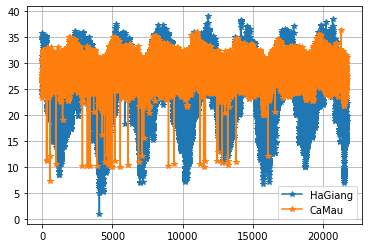

In [ ]:
data_temp.plot(style='-*')
plt.grid(True)

In [ ]:
#Liệt kê danh sách các row bị missing data 
#(Row có chứa thuộc tính bất kỳ bị missing - True )
#axis=1: Liệt kê các hàng | axis=0: Liệt kê các cột
data_temp.isnull().any(axis=1)

0        False
1        False
2        False
3        False
4        False
         ...  
21665    False
21666    False
21667    False
21668    False
21669    False
Length: 21670, dtype: bool

In [ ]:
#Liệt kê chi tiết các hàng có chứa giá trị null trong một thuộc tính bất kỳ
data_temp[data_temp.isnull().any(axis=1)]

,TimeVN,HaGiang,CaMau
19,2012-08-03 16:00,NaN,28.900000
20,2012-08-03 19:00,NaN,27.600000
21,2012-08-03 22:00,NaN,27.000000
22,2012-08-04 1:00,NaN,26.700001
23,2012-08-04 4:00,NaN,26.799999
...,...,...,...
12005,2016-09-09 22:00,27.900000,NaN
12076,2016-09-18 19:00,27.100000,NaN
12299,2016-10-16 16:00,33.200001,NaN
13163,2017-02-01 16:00,21.400000,NaN


In [ ]:
#Liệt kê các hàng có chứa giá trị null trong một cột được chỉ định.
#x = pd.isnull(data_temp['Ha Noi'])
#data_temp[x]

### 8.2) Xử lý dữ liệu Missing
---
Có 2 nhóm phương pháp được sử dụng để xử lý dữ liệu missing
* Loại bỏ các dữ liệu missing (Row, Column)
* Thay thế dữ liệu missing bằng giá trị khác

In [ ]:
#1) Phương pháp 1:Loại bỏ các dữ liệu missing (Deletion)

#Xóa toàn bộ các hàng chứa missing data: axis=0 -> xóa hàng
data_new = data_temp.dropna(axis=0,how='any')
#Kết quả sau khi loại bỏ các row chứa missing
print(data_new)

                 TimeVN    HaGiang      CaMau
0       2012-08-01 7:00  26.200001  25.400000
1      2012-08-01 10:00  31.400000  30.799999
2      2012-08-01 13:00  35.099998  30.000000
3      2012-08-01 16:00  35.799999  27.700001
4      2012-08-01 19:00  30.400000  28.100000
...                 ...        ...        ...
21665  2019-12-31 10:00  19.500000  30.200001
21666  2019-12-31 13:00  22.000000  31.500000
21667  2019-12-31 16:00  22.400000  31.200001
21668  2019-12-31 19:00  19.799999  27.600000
21669  2019-12-31 22:00  18.799999  27.000000

[21376 rows x 3 columns]


In [ ]:
#1) Phương pháp 1:Loại bỏ các dữ liệu missing (Deletion)

#Xóa toàn bộ các cột chứa missing data: axis=1 -> xóa cột
data_new = data_temp.dropna(axis=1,how='any')
#Kết quả sau khi loại bỏ các cột chứa missing
print(data_new)

                 TimeVN
0       2012-08-01 7:00
1      2012-08-01 10:00
2      2012-08-01 13:00
3      2012-08-01 16:00
4      2012-08-01 19:00
...                 ...
21665  2019-12-31 10:00
21666  2019-12-31 13:00
21667  2019-12-31 16:00
21668  2019-12-31 19:00
21669  2019-12-31 22:00

[21670 rows x 1 columns]


In [ ]:
#PHƯƠNG PHÁP 2: Thay thế (Imputation)
#2.1) Thay thế các dữ liệu mất mát bằng một hằng số cố định
value = 25.0
#thay thế các giá trị missing bằng một giá trị cố định Value
data_new = data_temp.fillna(value)
print(data_new)

                 TimeVN    HaGiang      CaMau
0       2012-08-01 7:00  26.200001  25.400000
1      2012-08-01 10:00  31.400000  30.799999
2      2012-08-01 13:00  35.099998  30.000000
3      2012-08-01 16:00  35.799999  27.700001
4      2012-08-01 19:00  30.400000  28.100000
...                 ...        ...        ...
21665  2019-12-31 10:00  19.500000  30.200001
21666  2019-12-31 13:00  22.000000  31.500000
21667  2019-12-31 16:00  22.400000  31.200001
21668  2019-12-31 19:00  19.799999  27.600000
21669  2019-12-31 22:00  18.799999  27.000000

[21670 rows x 3 columns]


In [ ]:
data_temp.mean()

C:\Users\DANG QUOC TOAN\AppData\Local\Temp\ipykernel_10628\2113602367.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_temp.mean()


HaGiang    23.786183
CaMau      27.994659
dtype: float64

In [ ]:
#PHƯƠNG PHÁP 2: Thay thế (Imputation)
#2.2)Thay thế các dữ liệu mất mát bằng giá trị liền trước của nó
data_new2 = data_temp.fillna(method='pad')
print(data_new2)

                 TimeVN    HaGiang      CaMau
0       2012-08-01 7:00  26.200001  25.400000
1      2012-08-01 10:00  31.400000  30.799999
2      2012-08-01 13:00  35.099998  30.000000
3      2012-08-01 16:00  35.799999  27.700001
4      2012-08-01 19:00  30.400000  28.100000
...                 ...        ...        ...
21665  2019-12-31 10:00  19.500000  30.200001
21666  2019-12-31 13:00  22.000000  31.500000
21667  2019-12-31 16:00  22.400000  31.200001
21668  2019-12-31 19:00  19.799999  27.600000
21669  2019-12-31 22:00  18.799999  27.000000

[21670 rows x 3 columns]


In [ ]:
#PHƯƠNG PHÁP 2: Thay thế (Imputation)
#2.3)Thay thế các dữ liệu mất mát bằng giá trị liền sau của nó
data_new3 = data_temp.fillna(method='bfill')
print(data_new3)

                 TimeVN    HaGiang      CaMau
0       2012-08-01 7:00  26.200001  25.400000
1      2012-08-01 10:00  31.400000  30.799999
2      2012-08-01 13:00  35.099998  30.000000
3      2012-08-01 16:00  35.799999  27.700001
4      2012-08-01 19:00  30.400000  28.100000
...                 ...        ...        ...
21665  2019-12-31 10:00  19.500000  30.200001
21666  2019-12-31 13:00  22.000000  31.500000
21667  2019-12-31 16:00  22.400000  31.200001
21668  2019-12-31 19:00  19.799999  27.600000
21669  2019-12-31 22:00  18.799999  27.000000

[21670 rows x 3 columns]


In [ ]:
#PHƯƠNG PHÁP 2: Thay thế (Imputation)
#2.4)Thay thế bằng giá trị trung bình
#Sử dụng hàm interpolate để thay thế giá trị missing với tham số:
#Thuật toán nội suy: Tuyến tính (linear)
#Hướng nội suy: Tiến lên (forward)
data_new4 = data_temp.interpolate(method='linear', limit_direction ='forward')
print(data_new4)

                 TimeVN    HaGiang      CaMau
0       2012-08-01 7:00  26.200001  25.400000
1      2012-08-01 10:00  31.400000  30.799999
2      2012-08-01 13:00  35.099998  30.000000
3      2012-08-01 16:00  35.799999  27.700001
4      2012-08-01 19:00  30.400000  28.100000
...                 ...        ...        ...
21665  2019-12-31 10:00  19.500000  30.200001
21666  2019-12-31 13:00  22.000000  31.500000
21667  2019-12-31 16:00  22.400000  31.200001
21668  2019-12-31 19:00  19.799999  27.600000
21669  2019-12-31 22:00  18.799999  27.000000

[21670 rows x 3 columns]


## 9. Phát hiện và xử lý ngoại lai (Outliers)
---
### 9.1 Phát hiện (Boxplot) 


In [ ]:
#Đọc dữ liệu file
#path_outlier = 'Data_Excercise/Data_Temp_Outlier.csv'
#data_outlier = pd.read_csv(path_outlier)
#data_outlier.info()

In [ ]:
#Sử dụng biểu đồ Boxplot phát hiện ngoại lai
# data_outlier.boxplot()

In [ ]:
data_outlier[['Nha Trang']].boxplot()

In [ ]:
data_outlier[['Nha Trang']].plot(style='-*', color='red')
plt.grid(True)

In [ ]:
data_outlier.loc[:10,['Nha Trang']]

In [ ]:
data_outlier[['Ho Chi Minh']].boxplot()

In [ ]:
data_outlier[['Ho Chi Minh']].plot(style='--o')
plt.grid(True)

In [ ]:
data_outlier.loc[10:15,['Ho Chi Minh']]

### 9.2 Xử lý
---

In [ ]:
#Tạo một bản sao dữ liệu
data_ok =data_outlier.copy()

In [ ]:
#Với giá trị ngoại lai trạm Nha trang
#Xử lý bằng cách thay thế giá trị: 2.51 --> 25.1
data_ok.loc[6,'Nha Trang'] = 25.1
data_ok[['Nha Trang']].plot(style='-*', color='red')
plt.grid(True)

In [ ]:
#Với giá trị ngoại lai trạm Hồ Chí Minh
#Xử lý bằng cách chuyển về giá trị Null
import numpy as np
data_ok.loc[13,'Ho Chi Minh'] = np.NaN
data_ok[['Ho Chi Minh']].plot(style='-*', color='red')
plt.grid(True)

### TRƯỜNG HỢP: Ngoại lai không phải là giá trị cực trị

In [ ]:
#Check ngoại lai trạm Hà Nội
data_outlier[['Ha Noi']].plot(style='--d', color='green')
plt.grid(True)

In [ ]:
data_outlier.loc[:10,['time','Ha Noi']]

## THỰC HÀNH
---
* Đọc dữ liệu từ file Data_Patient.csv vào biến kiểu dataframe
* Cho biết các cột chứa giá trị khuyết thiếu, xác định các vị trí thiếu dữ liệu và đề xuất phương án xử lý giá trị thiếu.
* Phát hiện giá trị ngoại lai và xử lý trong dữ liệu (nếu có)


In [ ]:
#{HỌC VIÊN VIẾT CODE XỬ LÝ Ở ĐÂY}
dataframe = pd.read_csv("D:\Source Code\Data_Analysis_Programming\Exercise_3\data\Data_Patient.csv")

In [ ]:
dataframe.isnull().any(axis=1)

0      False
1      False
2      False
3      False
4       True
       ...  
295    False
296    False
297    False
298    False
299    False
Length: 300, dtype: bool

In [ ]:
dataframe[dataframe.isnull().any(axis=1)]

,id,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8
4,Patient_05,41,Female,Atypical angina,130,204,172,NaN,0
20,Patient_21,64,Male,Typical angina,110,211,144,NaN,0
35,Patient_36,42,Male,Asymptomatic,140,226,178,NaN,0
205,Patient_206,58,Male,NaN,128,259,130,7.0,1
218,Patient_219,59,Male,NaN,138,271,182,3.0,0
240,Patient_241,41,Female,Atypical angina,126,306,163,NaN,0
250,Patient_251,58,Male,NaN,146,218,105,7.0,1
265,Patient_266,52,Male,Asymptomatic,128,204,156,NaN,1
270,Patient_271,66,Male,NaN,160,228,138,6.0,0
277,Patient_278,57,Male,Atypical angina,154,232,164,NaN,1


In [ ]:
data = dataframe.dropna(axis=0,how='any')

In [ ]:
data.head()

,id,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8
0,Patient_01,63,Male,Typical angina,145,233,150,6.0,0
1,Patient_02,67,Male,Asymptomatic,160,286,108,3.0,1
2,Patient_03,67,Male,Asymptomatic,120,229,129,7.0,1
3,Patient_04,37,Male,Non-anginal pain,130,250,187,3.0,0
5,Patient_06,56,Male,Atypical angina,120,236,178,3.0,0


<AxesSubplot:>

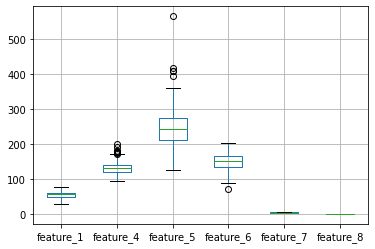

In [ ]:
dataframe.boxplot()

In [ ]:
data_ok =dataframe.copy()

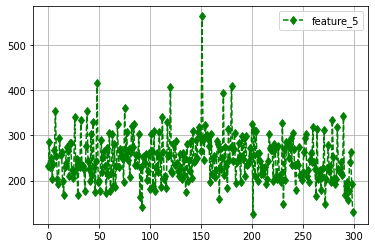

In [ ]:
dataframe[['feature_5']].plot(style='--d', color='green')
plt.grid(True)

<AxesSubplot:>

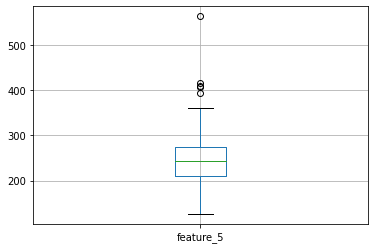

In [ ]:
dataframe[['feature_5']].boxplot()

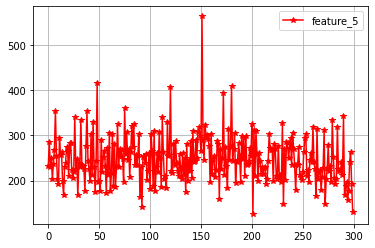

In [ ]:
dataframe[['feature_5']].plot(style='-*', color='red')
plt.grid(True)